In [1]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
 


Using TensorFlow backend.


In [2]:
# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

In [3]:
X, y = get_sequence(10)
print(X)
print(y)

[[[0.87013055]
  [0.18185194]
  [0.16382366]
  [0.22790657]
  [0.78035218]
  [0.24478474]
  [0.06089525]
  [0.57769967]
  [0.33048748]
  [0.12632132]]]
[[[0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]]]


In [4]:


# define problem properties
n_timesteps = 10
# define LSTM
model = Sequential()
model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)


Epoch 1/1
 - 1s - loss: 0.6943 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6949 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6928 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6933 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.6910 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.6897 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.6867 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.6899 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6847 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6831 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6842 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6680 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.6779 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6895 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.6738 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6766 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6752 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.7039 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.6842 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.6483 - accuracy: 0.7000


In [5]:
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [0] Predicted [0]
Expected: [1] Predicted [0]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]
Expected: [1] Predicted [1]


# bidirectional LSTM

In [6]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

# define problem properties
n_timesteps = 10
# define LSTM
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])

Epoch 1/1
 - 1s - loss: 0.7204 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7239 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.7200 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7062 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7155 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.7177 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.6992 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.7029 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.6994 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.6976 - accuracy: 0.2000
Epoch 1/1
 - 0s - loss: 0.6949 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7042 - accuracy: 0.1000
Epoch 1/1
 - 0s - loss: 0.6970 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.6932 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6996 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.6998 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.6885 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6832 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.6921 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6854 - accuracy: 0.7000


# compare LSTM to bidirectional LSTM

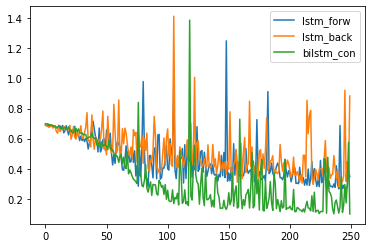

In [7]:
from random import random
from numpy import array
from numpy import cumsum
from matplotlib import pyplot
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def get_bi_lstm_model(n_timesteps, mode):
	model = Sequential()
	model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def train_model(model, n_timesteps):
	loss = list()
	for _ in range(250):
		# generate new random sequence
		X,y = get_sequence(n_timesteps)
		# fit model for one epoch on this sequence
		hist = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
		loss.append(hist.history['loss'][0])
	return loss


n_timesteps = 10
results = DataFrame()
# lstm forwards
model = get_lstm_model(n_timesteps, False)
results['lstm_forw'] = train_model(model, n_timesteps)
# lstm backwards
model = get_lstm_model(n_timesteps, True)
results['lstm_back'] = train_model(model, n_timesteps)
# bidirectional concat
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()

# Comparing Bidirectional LSTM Merge Modes

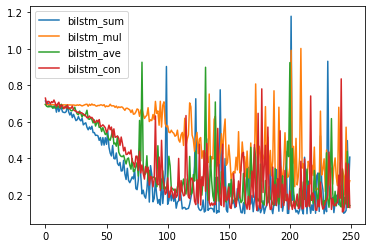

In [8]:
n_timesteps = 10
results = DataFrame()
# sum merge
model = get_bi_lstm_model(n_timesteps, 'sum')
results['bilstm_sum'] = train_model(model, n_timesteps)
# mul merge
model = get_bi_lstm_model(n_timesteps, 'mul')
results['bilstm_mul'] = train_model(model, n_timesteps)
# avg merge
model = get_bi_lstm_model(n_timesteps, 'ave')
results['bilstm_ave'] = train_model(model, n_timesteps)
# concat merge
model = get_bi_lstm_model(n_timesteps, 'concat')
results['bilstm_con'] = train_model(model, n_timesteps)
# line plot of results
results.plot()
pyplot.show()